In [1]:
# Import our dependencies
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf
import numpy as np

In [2]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from pathlib import Path

In [3]:
#bring in csv of drafted players
players_csv = "namedPlayers.csv"

In [4]:
drafted_df = pd.read_csv(players_csv)

In [5]:
drafted_df.head(5)

,Unnamed: 0,url,name,active_from,active_to,position,college,height,weight,birth_date,...,NCAA__3ptpg,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg
0,0,/players/a/abdelal01.html,Alaa Abdelnaby,1991,1995,F-C,Duke,6-10,240.0,"June 24, 1968",...,0.0,NaN,5.6,0.599,3.3,0.728,2.5,1.8,134.0,8.5
1,1,/players/a/abdulza01.html,Zaid Abdul-Aziz,1969,1978,C-F,Iowa State,6-9,235.0,"April 7, 1946",...,NaN,NaN,16.8,0.465,7.8,0.645,10.4,6.7,75.0,22.3
2,2,/players/a/abdulka01.html,Kareem Abdul-Jabbar,1970,1989,C,UCLA,7-2,225.0,"April 16, 1947",...,NaN,NaN,16.8,0.639,10.7,0.628,7.9,5.0,88.0,26.4
3,3,/players/a/abdulma02.html,Mahmoud Abdul-Rauf,1991,2001,G,LSU,6-1,162.0,"March 9, 1969",...,2.7,NaN,21.9,0.474,10.4,0.863,6.4,5.5,64.0,29.0
4,4,/players/a/abdulta01.html,Tariq Abdul-Wahad,1998,2003,F,"Michigan, San Jose State",6-6,223.0,"November 3, 1974",...,0.6,NaN,10.4,0.477,4.9,0.726,4.4,3.2,87.0,13.6


In [6]:
#change height into inches
def parse_ht(ht):
    # format: 7' 0.0"
    ht_ = ht.split("-")
    ft_ = float(ht_[0])
    in_ = float(ht_[1])
    return (12*ft_) + in_
    drafted_df["height"] = drafted_df["height"].apply(parse_ht(ht))

print (drafted_df["height"].apply(lambda x:parse_ht(x)))

0       82.0
1       81.0
2       86.0
3       73.0
4       78.0
        ... 
4980    82.0
4981    85.0
4982    73.0
4983    84.0
4984    75.0
Name: height, Length: 4985, dtype: float64


In [7]:
drafted_df["height"] = drafted_df["height"].apply(lambda x:parse_ht(x))
drafted_df.head()

,Unnamed: 0,url,name,active_from,active_to,position,college,height,weight,birth_date,...,NCAA__3ptpg,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg
0,0,/players/a/abdelal01.html,Alaa Abdelnaby,1991,1995,F-C,Duke,82.0,240.0,"June 24, 1968",...,0.0,NaN,5.6,0.599,3.3,0.728,2.5,1.8,134.0,8.5
1,1,/players/a/abdulza01.html,Zaid Abdul-Aziz,1969,1978,C-F,Iowa State,81.0,235.0,"April 7, 1946",...,NaN,NaN,16.8,0.465,7.8,0.645,10.4,6.7,75.0,22.3
2,2,/players/a/abdulka01.html,Kareem Abdul-Jabbar,1970,1989,C,UCLA,86.0,225.0,"April 16, 1947",...,NaN,NaN,16.8,0.639,10.7,0.628,7.9,5.0,88.0,26.4
3,3,/players/a/abdulma02.html,Mahmoud Abdul-Rauf,1991,2001,G,LSU,73.0,162.0,"March 9, 1969",...,2.7,NaN,21.9,0.474,10.4,0.863,6.4,5.5,64.0,29.0
4,4,/players/a/abdulta01.html,Tariq Abdul-Wahad,1998,2003,F,"Michigan, San Jose State",78.0,223.0,"November 3, 1974",...,0.6,NaN,10.4,0.477,4.9,0.726,4.4,3.2,87.0,13.6


In [8]:
#create a drafted column
drafted_df["drafted"]= 1

In [9]:
#break data into 2 sets, average games per season = 82, used relative less than 2 years of playing to 
#seperate those with strong careers post draft

drafted_df.loc[drafted_df.NBA_g_played<164,'drafted']=0

drafted_df.loc[drafted_df.NBA_g_played>164,'drafted']=1

In [10]:
#replace NAN values with 0

drafted_df= drafted_df.fillna(0)

In [11]:
drafted_df.head()

,Unnamed: 0,url,name,active_from,active_to,position,college,height,weight,birth_date,...,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg,drafted
0,0,/players/a/abdelal01.html,Alaa Abdelnaby,1991,1995,F-C,Duke,82.0,240.0,"June 24, 1968",...,0.0,5.6,0.599,3.3,0.728,2.5,1.8,134.0,8.5,1
1,1,/players/a/abdulza01.html,Zaid Abdul-Aziz,1969,1978,C-F,Iowa State,81.0,235.0,"April 7, 1946",...,0.0,16.8,0.465,7.8,0.645,10.4,6.7,75.0,22.3,1
2,2,/players/a/abdulka01.html,Kareem Abdul-Jabbar,1970,1989,C,UCLA,86.0,225.0,"April 16, 1947",...,0.0,16.8,0.639,10.7,0.628,7.9,5.0,88.0,26.4,1
3,3,/players/a/abdulma02.html,Mahmoud Abdul-Rauf,1991,2001,G,LSU,73.0,162.0,"March 9, 1969",...,0.0,21.9,0.474,10.4,0.863,6.4,5.5,64.0,29.0,1
4,4,/players/a/abdulta01.html,Tariq Abdul-Wahad,1998,2003,F,"Michigan, San Jose State",78.0,223.0,"November 3, 1974",...,0.0,10.4,0.477,4.9,0.726,4.4,3.2,87.0,13.6,1


In [12]:
#assign data to X and Y
#using the NCAA college data from drafted players to form our model

X =drafted_df[['height','weight','NCAA__3ptapg','NCAA_fgapg','NCAA_ftapg','NCAA_ppg']]
y = drafted_df['drafted'].astype(int)

In [13]:
print("Shape: ", X.shape, y.shape)

Shape:  (4985, 6) (4985,)


In [14]:
#split data into training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

<b>Logistic Regression Model<b>

In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [16]:
 classifier.fit(X_train, y_train)

C:\Users\maris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6452648475120385
Testing Data Score: 0.6720128307939054


In [18]:
print(f'Actual:\t\t{list(y_test[:10])}')
print(f'Predicted:\t{list(classifier.predict(X_test[:10]))}')

Actual:		[0, 1, 1, 1, 1, 0, 1, 1, 0, 0]
Predicted:	[0, 1, 0, 0, 0, 0, 0, 0, 1, 0]


<b>Feature Importances<b>

In [19]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier
from IPython.display import Image 
from sklearn.tree import export_graphviz
from sklearn import tree

from sklearn.metrics import mean_squared_error
import pickle
import seaborn as sns; sns.set(style ='white', color_codes = True)

In [20]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(5,5))
    plt.barh(range(n_features), model.feature_importances_, align='center', color = 'green') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [21]:
X =drafted_df[['height','weight','NCAA__3ptapg','NCAA_fgapg','NCAA_ftapg','NCAA_ppg']]
y = drafted_df['drafted'].astype(int)

In [22]:
ctree = DecisionTreeClassifier(max_depth = 2)

In [23]:
#train_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=42)

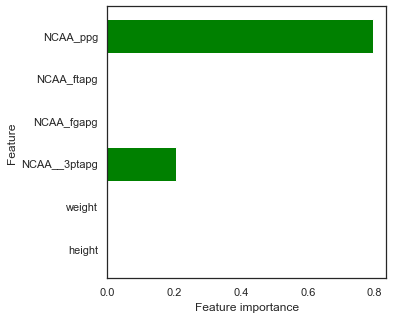

In [24]:
plot_feature_importances(ctree.fit(X_train, y_train))

<b>Random Forest Classifier<p>
NCAA Points per game and Weight top two features<b>

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap

Feature: 0, Score: 0.12705
Feature: 1, Score: 0.20367
Feature: 2, Score: 0.10475
Feature: 3, Score: 0.17388
Feature: 4, Score: 0.17908
Feature: 5, Score: 0.21156


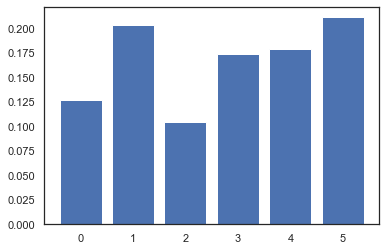

In [26]:
# random forest for feature importance on a classification problem

from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
# Feautures and Predicted
X =drafted_df[['height','weight','NCAA__3ptapg','NCAA_fgapg','NCAA_ftapg','NCAA_ppg']]
y = drafted_df['drafted'].astype(int)

#X, y = df1.columns(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

<b>Scale the data<p>
Scaled data improved training score but reduced testing score<b>

In [27]:
 # Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [28]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9538152610441767
Testing Score: 0.5899264542010252


<b> Randon Forest Regressor model using shap<p>
    Top 4 features identified were NCAA points per game, Height, NCAA 3 point average, and weight<b>

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt


# train the model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

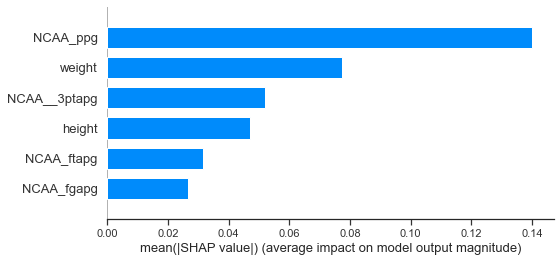

In [30]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

<b> PCA model<p>
Top 4 features used.

In [31]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [32]:
drafted_scaled = StandardScaler().fit_transform(drafted_df[['height','weight','NCAA__3ptapg','NCAA_fgapg','NCAA_ftapg','NCAA_ppg']])

In [33]:
# Initialize PCA model
pca = PCA(n_components=4)

# Get two principal components for the iris data.
drafted_pca = pca.fit_transform(drafted_scaled)

In [34]:
df_drafted_pca = pd.DataFrame(
    data=drafted_pca, columns=["NCAA_ppg", "weight","NCAA__3ptapg","height"]
)
df_drafted_pca.head()

,NCAA_ppg,weight,NCAA__3ptapg,height
0,-0.319952,-1.681980,-0.037792,-0.044110
1,3.574833,-1.614136,-1.399814,-0.350576
2,3.312079,-2.242617,-1.143724,1.074025
3,4.647617,2.878220,1.400560,0.598224
4,1.183665,-0.312754,0.127959,-0.342097


In [35]:
 # Fetch the explained variance
pca.explained_variance_ratio_

array([0.5099203 , 0.31206682, 0.12490748, 0.03401018])

<b>K Means<b>

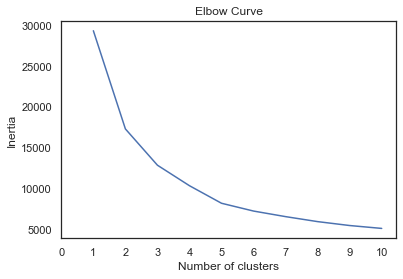

In [36]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_drafted_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [37]:
# Predicting clusters with k=5

# Initialize the k-means model
model = KMeans(n_clusters=5, random_state=0)

# Fit the model
model.fit(df_drafted_pca)

# Predict clusters
predictions = model.predict(df_drafted_pca)

# Add the predicted class column to the dataframe
df_drafted_pca["drafted"] = model.labels_
df_drafted_pca.head()

,NCAA_ppg,weight,NCAA__3ptapg,height,drafted
0,-0.319952,-1.681980,-0.037792,-0.044110,3
1,3.574833,-1.614136,-1.399814,-0.350576,4
2,3.312079,-2.242617,-1.143724,1.074025,3
3,4.647617,2.878220,1.400560,0.598224,0
4,1.183665,-0.312754,0.127959,-0.342097,3


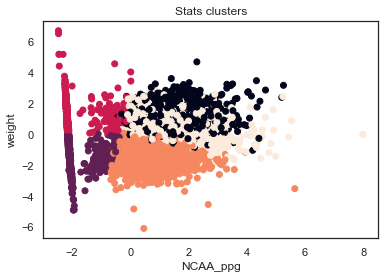

In [38]:
# Visualize the clusters
plt.scatter(x=df_drafted_pca['NCAA_ppg'], y=df_drafted_pca['weight'], c=df_drafted_pca['drafted'])
plt.xlabel('NCAA_ppg')
plt.ylabel('weight')
plt.title('Stats clusters')
plt.show()